# Initial Setup

## Libraries

In [1]:
import warnings
import sys
warnings.filterwarnings('ignore')

import logging
logging.getLogger("tensorflow").setLevel(logging.DEBUG)

logger = logging.getLogger(__name__)
 
import pprint
import pylab
import matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd

import scipy
from scipy import signal
from scipy.io import wavfile

from tqdm import tqdm_notebook

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler

font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [2]:
print("=== Library Versions ===")
print("SciPy:     ",scipy.__version__)
print("Numpy:     ",np.__version__)

=== Library Versions ===
SciPy:      1.6.0
Numpy:      1.19.5


## Custom Functions

In [14]:
DEBUG = False

FILENAME = 'video_PoCAlgo_100mm-s_cf'
HOME_FOLDER = '../../docs/logs/'

# Data
DATASET = HOME_FOLDER+FILENAME+'.csv'

print("=== File Configuration ===")
print("Data Input :", DATASET)

=== File Configuration ===
Data Input : ../../docs/logs/video_PoCAlgo_100mm-s_cf.csv


Timedrift:  0.9992509937888199


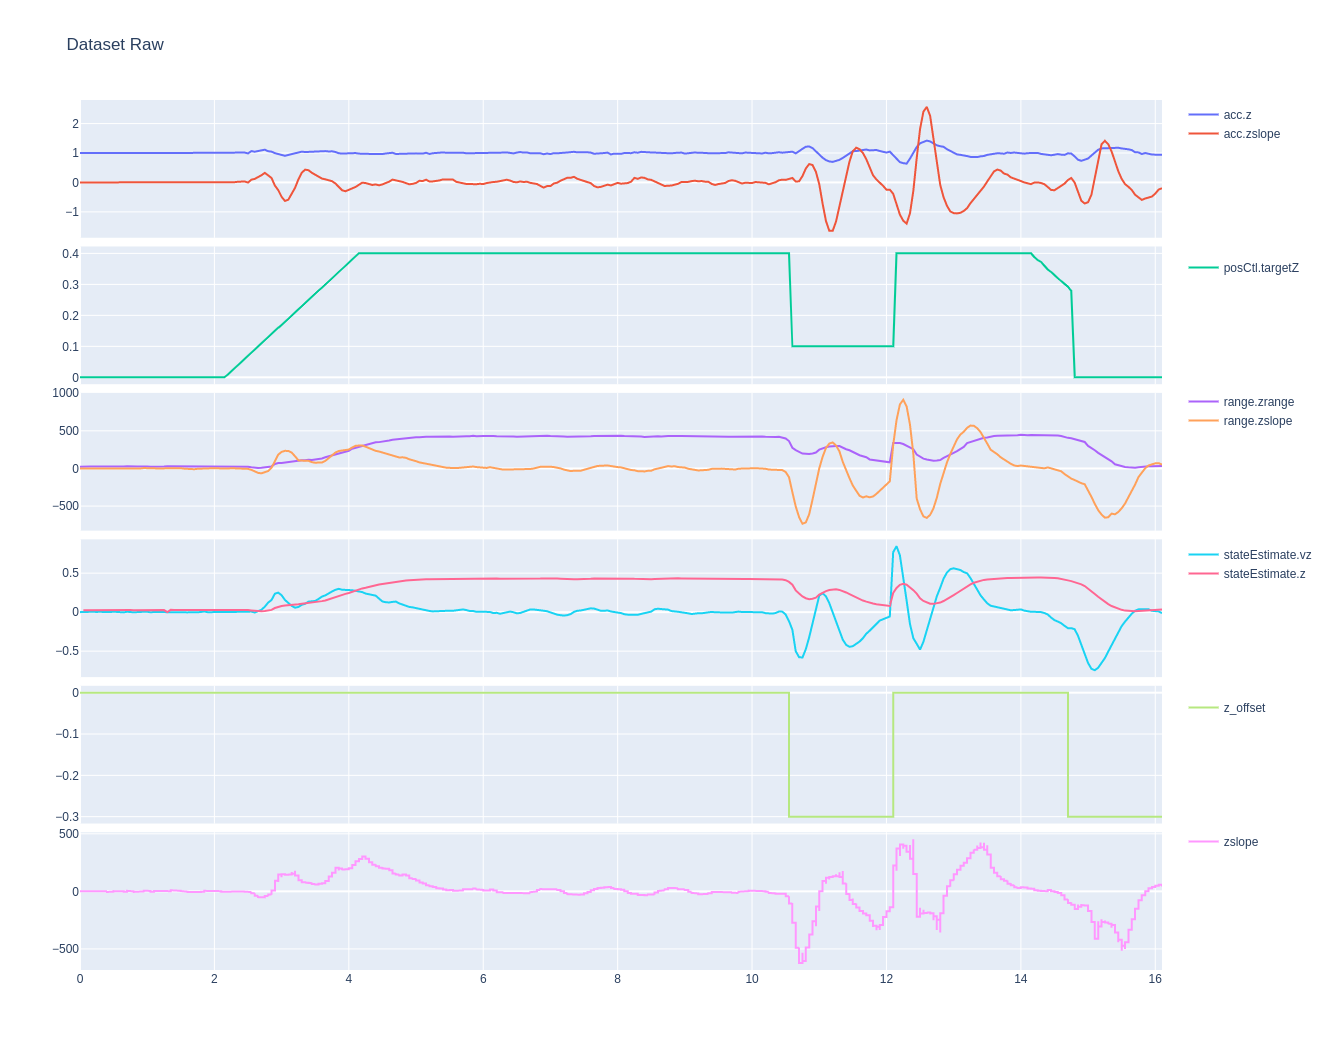

In [20]:
CF_df = pd.read_csv(DATASET, header=0, names=["Timestamp", "Timestamp_CF", "ID", "Value"]) # New dataformat including timestamp from crazyfly
#CF_df    = pd.read_csv(TRAIN_SENSOR_IN,  header=0, names=["Timestamp", "ID", "Value"])

drone_t0 = CF_df["Timestamp_CF"].iloc[0]

timedrift_slope = (CF_df["Timestamp"].iloc[-1]-CF_df["Timestamp"].iloc[0])/(CF_df["Timestamp_CF"].iloc[-1]-CF_df["Timestamp_CF"].iloc[0])

CF_df["Timestamp_CF"] = CF_df["Timestamp_CF"]-drone_t0
#CF_df["Timestamp_CF"] /= timedrift_slope
CF_df["Timestamp"] = CF_df["Timestamp_CF"]

print("Timedrift: ", timedrift_slope)

groups = np.unique([x.split(".")[0] for x in np.unique(CF_df["ID"])]) 

fig = make_subplots(rows=len(groups), cols=1, shared_xaxes=True, vertical_spacing=0.01)
                                                                                             
# extract the time-of-flight sensor value
for k, group in CF_df.groupby(["ID"]):
    index = groups.tolist().index(k.split(".")[0])+1
    group = group.reset_index()
    fig.append_trace(go.Scatter(x=group["Timestamp"]/1000, y= group["Value"], mode="lines", name=k, legendgroup = index), row = index, col = 1)              

fig.update_layout(
    title_text="Dataset Raw", 
    height=(len(groups)+1)*150, 
    width=15*80, 
    legend_tracegroupgap = 115,
)
fig.show()